# COMPUTER VISON PROJECT - 1

## Author: Sridharan Chandran

## Part B 
•DOMAIN:  Botanical Research

•CONTEXT: University  X  is  currently  undergoing  some  research  involving  understanding  the  characteristics  of flowers.  They  already  have have  invested  on  curating  sample  images.  They  require  an  automation  which  can  create  a  classifier  capable  of  determining  a flower’s species from a photo.

•DATA DESCRIPTION: The dataset comprises of images from 17 plant species.

•PROJECT OBJECTIVE: To experiment with   various  approaches  to train an image class ifier to predict type of flower from the image.

## 1.Import and Understand the data 
### A.Import and read oxflower17 dataset from tflearn and split into X and Y while loading.
Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.It can be loaded using: x, y = oxflower17.load_data() 
### B.Print Number of images and shape of the images. 
### C.Print count of each class from y. 

In [1]:
#Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from glob import glob
import cv2
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
!pip install tflearn # Install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=892a8d095335ee203e7e088fcf7ee3fce827e71b5b14f8981d3946dd15b10da3
  Stored in directory: /root/.cache/pip/wheels/4a/d5/f8/9585b4a100c0fd73da204ee785457d67c85e1b9050f009a849
Successfully built tflearn


In [3]:
import tflearn.datasets.oxflower17 as oxflower17

# Load the dataset
X, Y = oxflower17.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [4]:
# Print the number and shape of images
print("Number of images:", len(X))
print("Shape of images:", X[0].shape)

Number of images: 1360
Shape of images: (224, 224, 3)


In [5]:
# Print the count of each class from Y
from collections import Counter
print("Count of each class:", Counter(Y))

Count of each class: Counter({14: 80, 4: 80, 10: 80, 5: 80, 8: 80, 7: 80, 13: 80, 12: 80, 6: 80, 0: 80, 1: 80, 15: 80, 16: 80, 3: 80, 2: 80, 11: 80, 9: 80})


In [6]:
Y1 = set(Y) # No. of Classifications

In [7]:
print('Target classifications are', Y1)

Target classifications are {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


## 2.Image Exploration & Transformation 
### A.Display 5 random images. 
### B.Select any image from the dataset and assign it to a variable. 
### C.Transform the image into grayscale format and display the same. 
### D.Apply a filter to sharpen the image and display the image before and after sharpening. 
### E.Apply a filter to blur the image and display the image before and after blur. 
### F.Display all the 4 images from above questions besides each other to observe the difference. 

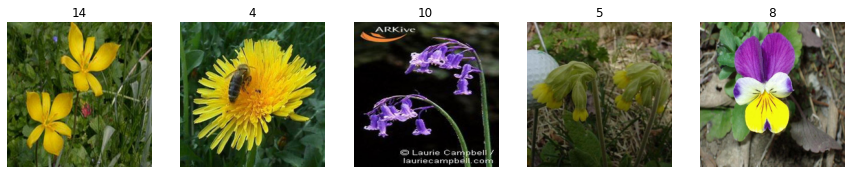

In [8]:
# Load 5 sample images
images = X

# Define the figure and subplot layout
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Loop over each subplot and display the corresponding image
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis('off')
    ax.set_title(Y[i])

# Show the plot
plt.show()

In [9]:
#Select an image from the dataset
img_idx = 1
img = X[img_idx]

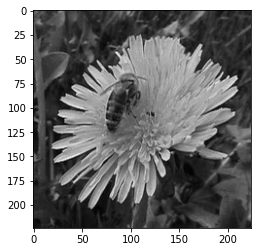

In [10]:
# Transform the image into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

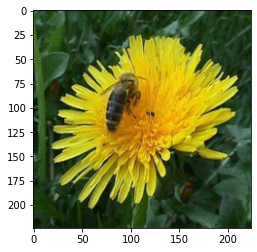

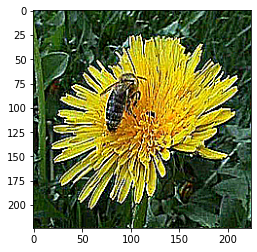

In [11]:
# Display origial image
plt.imshow(img)
plt.show()

# Display sharpened image
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, sharpen_kernel)
plt.imshow(sharpened)

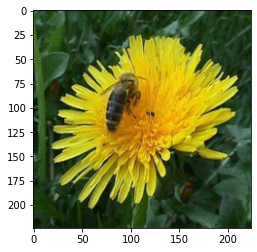

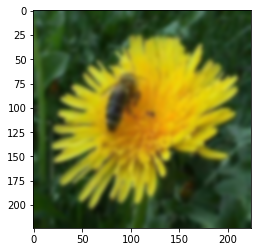

In [12]:
# Display origial image
plt.imshow(img)
plt.show()

# Display blurred image
blurred = cv2.GaussianBlur(img, (11, 11), 0)
plt.imshow(blurred)

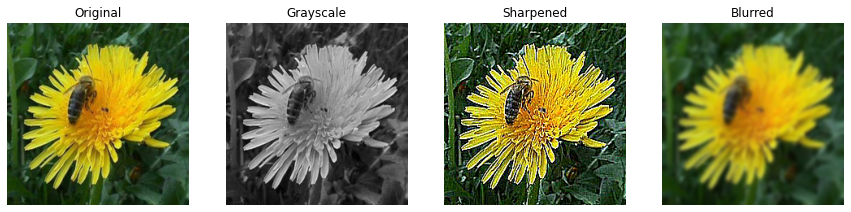

In [13]:
# Display original, grayscale, sharpened, and blurred images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title("Original")
axes[1].imshow(gray, cmap='gray')
axes[1].set_title("Grayscale")
axes[2].imshow(sharpened)
axes[2].set_title("Sharpened")
axes[3].imshow(blurred)
axes[3].set_title("Blurred")
for ax in axes:
    ax.axis('off')
plt.show()

## 3.Model training and Tuning: 
### A.Split the data into train and test with 80:20 proportion. 
### B.Train a model using any Supervised Learning algorithm and share performance metrics on test data. 
### C.Train a model using Neural Network and share performance metrics on test data. 
### D.Train a model using a basic CNN and share performance metrics on test data.
### E.Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

In [14]:
from sklearn.linear_model import LogisticRegression

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# Train a logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train.reshape(X_train.shape[0], -1), Y_train)

LogisticRegression(random_state=42)

In [16]:
# Predict the classes
Y_pred = lr.predict(X_test.reshape(X_test.shape[0], -1)) #'-1' used for auto detect the features

In [17]:
# Evaluation metrics
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred, average='weighted')
rec = recall_score(Y_test, Y_pred, average='weighted')
print(f"Logistic Regression Metrics:\nAccuracy: {round(acc,2)}\nPrecision: {round(prec,2)}\nRecall: {round(rec,2)}")

Logistic Regression Metrics:
Accuracy: 0.49
Precision: 0.53
Recall: 0.49


In [18]:
print ('Classification Report : ')
print (classification_report(Y_pred, Y_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.22      0.29      0.25        14
           1       0.43      0.43      0.43        14
           2       0.47      0.80      0.59        10
           3       0.36      0.42      0.39        19
           4       0.62      0.62      0.62        16
           5       0.27      0.24      0.25        17
           6       0.44      0.35      0.39        20
           7       0.50      0.53      0.51        17
           8       0.83      0.45      0.59        22
           9       0.65      0.61      0.63        18
          10       0.53      0.73      0.62        11
          11       0.50      0.44      0.47        16
          12       0.62      0.47      0.53        17
          13       0.28      1.00      0.43         5
          14       0.22      0.31      0.26        13
          15       0.64      0.33      0.44        27
          16       0.93      0.88      0.90        16

 

confusion_matrix


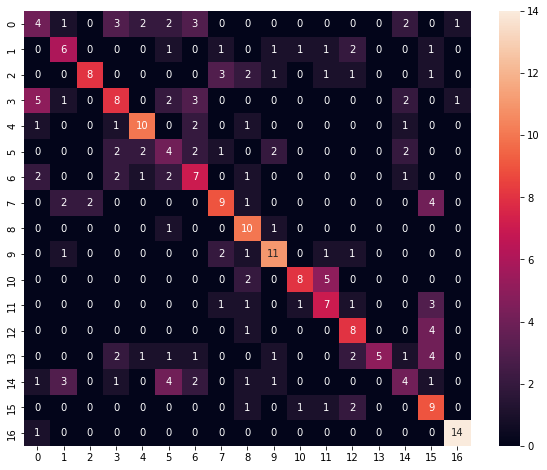

In [19]:
cm = confusion_matrix(Y_test, Y_pred)
print("confusion_matrix")
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True);

In Logistic regression algorithm we got average accuracy of 53% only. Hence we assume that supervised learning algorithm is performs poorly for image classification. Lets try with ANN algorithms.

### Build a Neural Network model

In [20]:
# Reshape the input data
X_train1 = np.reshape(X_train, (X_train.shape[0], 224*224*3))
X_test1 = np.reshape(X_test, (X_test.shape[0], 224*224*3))

In [21]:
X_train1.shape

(1088, 150528)

In [22]:
# Normalize the data # Convert the values between 0 to 1.
X_train1 = X_train1/255
X_test1 = X_test1/255

In [23]:
from keras.utils import to_categorical

# Convert integer targets to binary matrices
Y_train1 = to_categorical(Y_train)
Y_test1 = to_categorical(Y_test)

In [24]:
X_train1.shape

(1088, 150528)

In [25]:
#Create a Neural Network model
model = Sequential()

# Add hidden & Output layers
model.add(Dense(64, input_shape=(150528,), activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(17, activation='softmax'))

# adam optmizer with custom learning rate
opt= optimizers.Adam(0.001)

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Fit the model
Flower = model.fit(X_train1,Y_train1, validation_data=(X_test1,Y_test1),epochs=30, batch_size=32)

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 4s 3ms/sample - loss: 2.8336 - acc: 0.0561 - val_loss: 2.8148 - val_acc: 0.1140
Epoch 2/30
1088/1088 [==============================] - 1s 542us/sample - loss: 2.7127 - acc: 0.1085 - val_loss: 2.5422 - val_acc: 0.1250
Epoch 3/30
1088/1088 [==============================] - 1s 557us/sample - loss: 2.4630 - acc: 0.1213 - val_loss: 2.2450 - val_acc: 0.2169
Epoch 4/30
1088/1088 [==============================] - 1s 563us/sample - loss: 2.3171 - acc: 0.1700 - val_loss: 2.1213 - val_acc: 0.2463
Epoch 5/30
1088/1088 [==============================] - 1s 554us/sample - loss: 2.1594 - acc: 0.2151 - val_loss: 2.0404 - val_acc: 0.2574
Epoch 6/30
1088/1088 [==============================] - 1s 548us/sample - loss: 2.0700 - acc: 0.2353 - val_loss: 2.0202 - val_acc: 0.2426
Epoch 7/30
1088/1088 [==============================] - 1s 566us/sample - loss: 2.0424 - acc: 0.2463 - val_loss: 2.1342 - val_a

In [26]:
# score of test data
score = model.evaluate(X_test1, Y_test1)
print("Loss : %.2f" %(score[0]))
print("Accuracy : %.2f" %(score[1]))

Loss : 1.89
Accuracy : 0.34


We built an ANN model & we got average accuracy of 46% only. Hence we assume that ANN is performs poorly for image classification. Lets try with CNN network.

### Build a CNN model

In [27]:
# Normalize the data # Convert the values between 0 to 1.
X_train_1 = X_train/255
X_test_1 = X_test/255

In [28]:
# model architecture building
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (224, 224, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3)))
model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')) 
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(Convolution2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 

# fully connected layer
model_1.add(Dense(units = 32,activation = 'relu'))

# Classification layer
model_1.add(Dense(units = 17, activation = 'softmax')) 

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
# adam optmizer with custom learning rate
opt= optimizers.Adam(0.001)

#Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [30]:
# Train the model
history = model_1.fit(X_train_1, Y_train1, epochs=50, batch_size=32, validation_data=(X_test_1, Y_test1))

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 18s 16ms/sample - loss: 2.6433 - acc: 0.1314 - val_loss: 2.8851 - val_acc: 0.0625
Epoch 2/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 2.1169 - acc: 0.3171 - val_loss: 5.0076 - val_acc: 0.0625
Epoch 3/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 1.6184 - acc: 0.4568 - val_loss: 4.1514 - val_acc: 0.0515
Epoch 4/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 1.2677 - acc: 0.5827 - val_loss: 6.0247 - val_acc: 0.0625
Epoch 5/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.8437 - acc: 0.7160 - val_loss: 5.9581 - val_acc: 0.0735
Epoch 6/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.6159 - acc: 0.7914 - val_loss: 4.5718 - val_acc: 0.0735
Epoch 7/50
1088/1088 [==============================] - 8s 8ms/sample - loss: 0.3968 - acc: 0.8713 - val_loss: 7.5143 - val_acc: 0.0919

With above model maximum we got 55% accuracy on validation data. However Train accuracy is in the mazimum limit. Which is an overfit model. Hence we have to do some model tuning. First lets try with Data Augmentation.

In [31]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

history = model_1.fit_generator(
    datagen.flow(X_train_1, Y_train1, batch_size=32),
    steps_per_epoch=len(X_train_1) / 32,
    epochs=30,
    validation_data=(X_test_1, Y_test1))


Epoch 1/30
34/34 [==============================] - 15s 422ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.7635 - acc: 0.2629 - val_loss: 2.1090 - val_acc: 0.3125
Epoch 2/30
34/34 [==============================] - 14s 408ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.9339 - acc: 0.3502 - val_loss: 1.6161 - val_acc: 0.4779
Epoch 3/30
34/34 [==============================] - 14s 409ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.8519 - acc: 0.3676 - val_loss: 1.6317 - val_acc: 0.4706
Epoch 4/30
34/34 [==============================] - 14s 404ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.6972 - acc: 0.4035 - val_loss: 1.6099 - val_acc: 0.4596
Epoch 5/30
34/34 [==============================] - 14s 407ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.5950 - acc: 0.4623 - val_loss: 1.4321 - val_acc: 0.5294
Epoch 6/30
34/34 [==============================] - 14s 411ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.4680 - acc: 0.5064 - val_loss: 1.4313 - val_acc: 0.4890
Epoc

In [32]:
# score of test data
score = model_1.evaluate(X_test_1, Y_test1)
print("Loss : %.2f" %(score[0]))
print("Accuracy : %.2f" %(score[1]))

Loss : 1.02
Accuracy : 0.68


We got 68% accuracy which is significant improvement on model after data augmentation. Further we can use other techniques improve our model. Lets try with increased epochs.

In [33]:
# Increase the model epochs from 30 to 100 for better accuracy
history = model_1.fit_generator(
    datagen.flow(X_train_1, Y_train1, batch_size=32),
    steps_per_epoch=len(X_train_1) / 32,
    epochs=100,
    validation_data=(X_test_1, Y_test1))

Epoch 1/100
34/34 [==============================] - 14s 408ms/step - batch: 16.5000 - size: 32.0000 - loss: 0.8809 - acc: 0.6994 - val_loss: 1.0196 - val_acc: 0.6691
Epoch 2/100
34/34 [==============================] - 14s 412ms/step - batch: 16.5000 - size: 32.0000 - loss: 0.9536 - acc: 0.6967 - val_loss: 1.0578 - val_acc: 0.6618
Epoch 3/100
34/34 [==============================] - 14s 407ms/step - batch: 16.5000 - size: 32.0000 - loss: 0.8481 - acc: 0.7206 - val_loss: 0.9851 - val_acc: 0.6838
Epoch 4/100
34/34 [==============================] - 14s 403ms/step - batch: 16.5000 - size: 32.0000 - loss: 0.8085 - acc: 0.7344 - val_loss: 1.0561 - val_acc: 0.6838
Epoch 5/100
34/34 [==============================] - 13s 401ms/step - batch: 16.5000 - size: 32.0000 - loss: 0.8959 - acc: 0.6903 - val_loss: 1.0251 - val_acc: 0.6765
Epoch 6/100
34/34 [==============================] - 13s 401ms/step - batch: 16.5000 - size: 32.0000 - loss: 0.8213 - acc: 0.7114 - val_loss: 0.9784 - val_acc: 0.687

In [43]:
# score of test data
score = model_1.evaluate(X_test_1, Y_test1)
print("Loss : %.2f" %(score[0]))
print("Accuracy : %.2f" %(score[1]))

Loss : 1.06
Accuracy : 0.71


In [44]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 111, 111, 256)    

In [36]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0.5, 1.0, 'Training and validation loss')

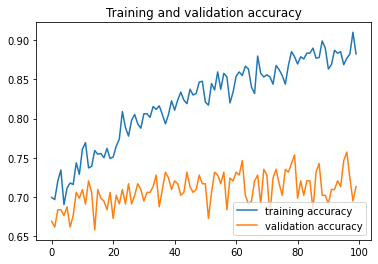

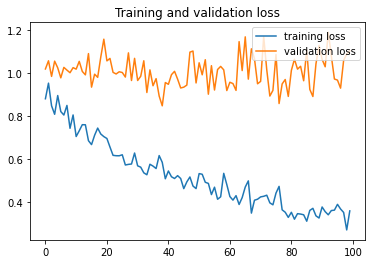

In [37]:
# Plot the training & Validation Loss & accuracy
Acc = history.history['acc']
Val_acc  = history.history['val_acc']
Loss     = history.history['loss']
Val_loss = history.history['val_loss']

epochs   = range(len(Acc)) # Get number of epochs

plt.plot  ( epochs, Acc, label = 'training accuracy' )
plt.plot  ( epochs, Val_acc, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, Loss, label = 'training loss' )
plt.plot  ( epochs, Val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


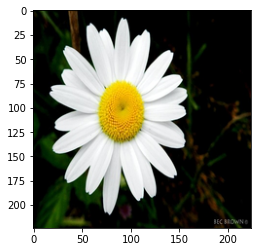

In [41]:
import matplotlib.image as mpimg
import os

image_path = '/content/drive/My Drive/Colab Notebooks/My Python Projects/CV Project 1 - CNN Architecture/Prediction.jpg'

# Load image from file
img = mpimg.imread(image_path)
plt.imshow(img);

In [42]:
import cv2

# Load the image to predict
img = cv2.imread(image_path)

# Preprocess the image to match the input format of CNN model
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Pass the preprocessed image through the model using the `predict` function
predictions = model_1.predict(img)

# Interpret the model's output to determine the predicted class or classes
predicted_class = np.argmax(predictions)

# Print the predicted class
print('Predicted class:', predicted_class)

Predicted class: 3
